<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Outlier Detection</h1>
</div>

© Copyright Machine Learning Plus

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. What are outliers and why should you treat the outliers?</h2>
</div>

**What are outliers?**

In statistics, outliers are those specific data points which differ significantly from other data points in the dataset. There can be various reasons behind the outliers. It can be because of some event or some experimental/data entry error. 

Outliers are often categorised as point and pattern outliers. Point outliers are the one which are single instances/datapoints of something abnormal, on the other hand pattern outliers are the clusters of instances/datapoints of something abnormal.

**Why should you treat the outliers?**

Outlier values present in the data, comes equipped with various problems. There are lot of issues with outlier values. Some of those are
- Various algorithms work on minimizing the error/cost function. Outliers might force the alogrithm to fit the model far from the actual relationship 
- If you intend to find relationship between two variables or find overall pattern in some population, outliers could lead to incorrect relationship/correlation or rejecting the normality hypothesis etc

Note: Outliers are not necessarily a bad thing to have in the data. Sometimes these are just observations that are not following the same pattern than the other ones. But it can be the case that an outlier is very interesting for Science. For example, if in a vaccination experiment, a person is infected with COVID-19 whereas all other vaccinated people are immune to COVID-19, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers. 

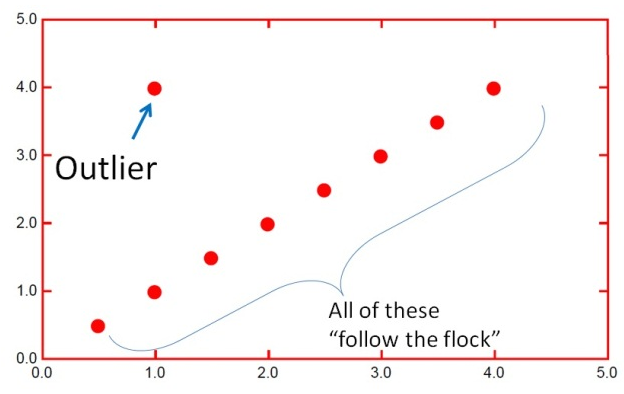

source : [Leadup Collective](https://leadupcollective.org/2017/06/02/statistics-high-performers-studying-the-outliers/)

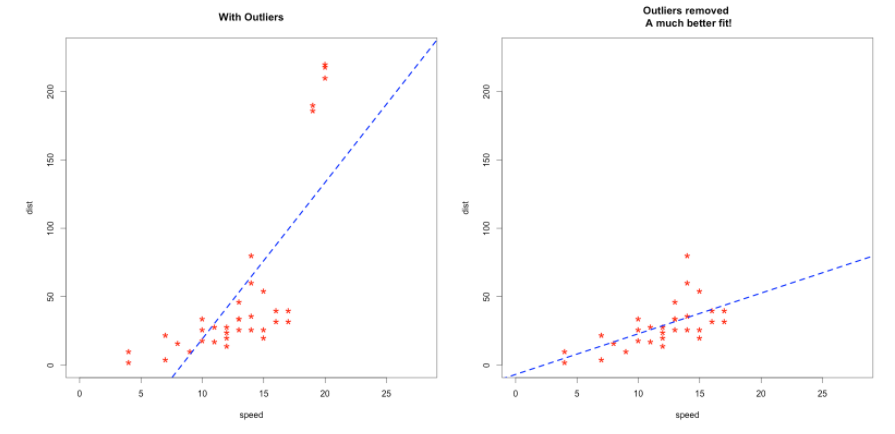

source: r-statistics.co

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Outlier Detection using Box and Whisker Plot</h2>
</div>

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used to detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

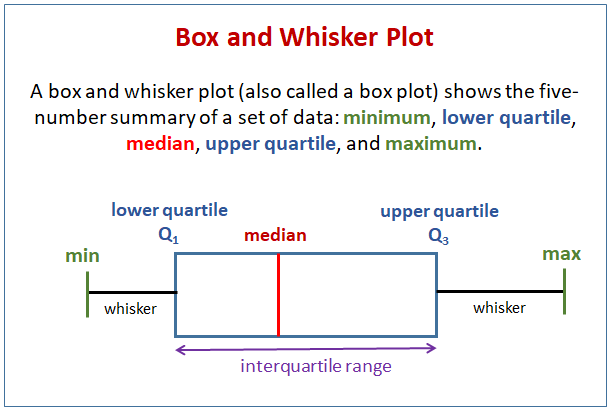

source: [Online Math Learning](https://www.onlinemathlearning.com/box-plot.html)

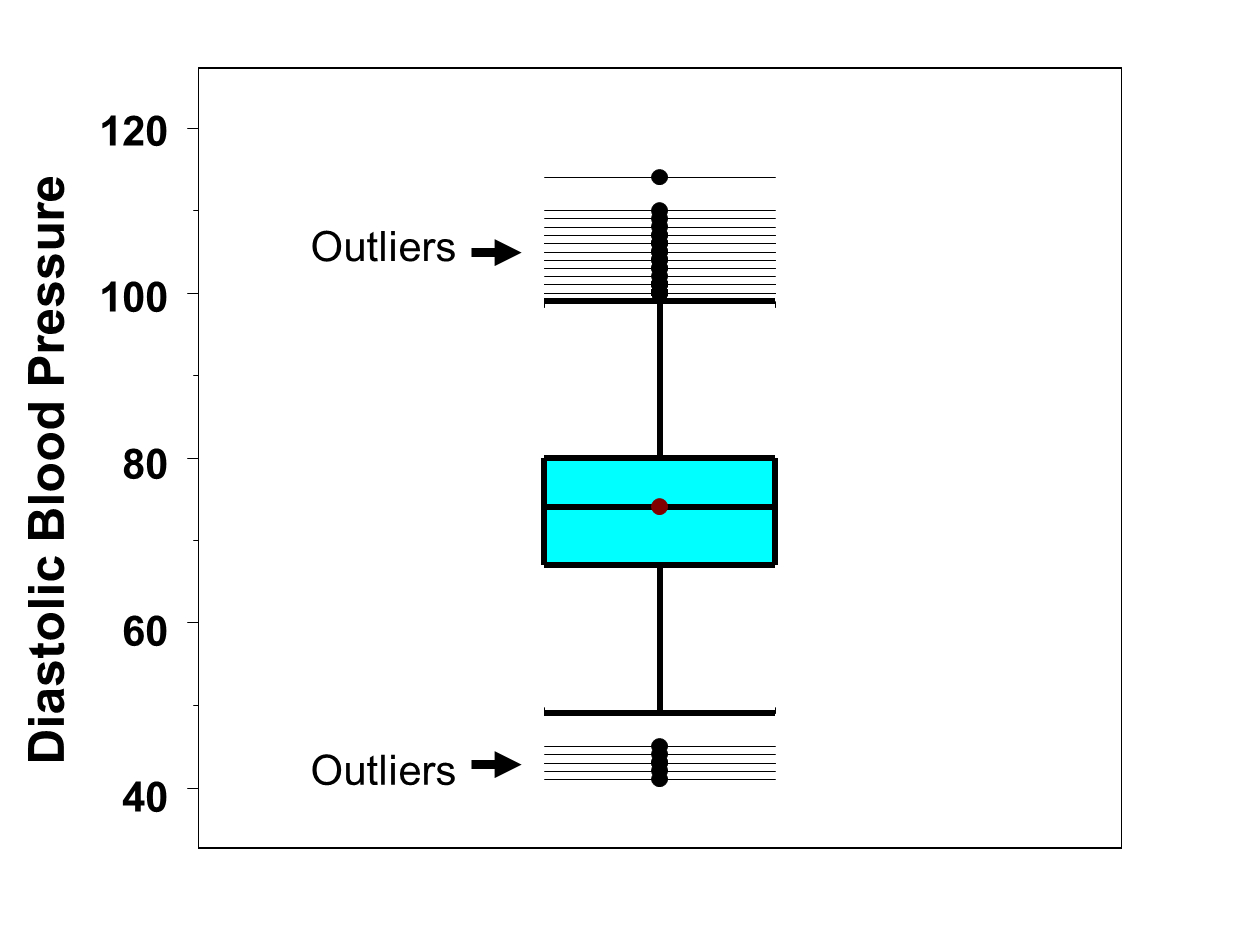

source: [bumc.bu.edu](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata8.html)

__Import Data__

In [2]:
# import libraries
import pandas as pd 
import numpy as np  

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
# load data
df = fetch_california_housing()
df.data.shape
df.target_names

['MedHouseVal']

In [4]:
x = df.data
y = df.target

columns = df.feature_names

# Create DataFrames

california_df = pd.DataFrame(df.data)
california_df.columns = columns
california_df.shape

(20640, 8)

__crim__
per capita crime rate by town.

__zn__
proportion of residential land zoned for lots over 25,000 sq.ft.

__indus__
proportion of non-retail business acres per town.

__chas__
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

__nox__
nitrogen oxides concentration (parts per 10 million).

__rm__
average number of rooms per dwelling.

__age__
proportion of owner-occupied units built prior to 1940.

__dis__
weighted mean of distances to five Boston employment centres.

__rad__
index of accessibility to radial highways.

__tax__
full-value property-tax rate per \$10,000.

__ptratio__
pupil-teacher ratio by town.

__black__
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

__lstat__
lower status of the population (percent).

__medv__
median value of owner-occupied homes in \$1000s./


#### Drow boxplot for all columns one by one

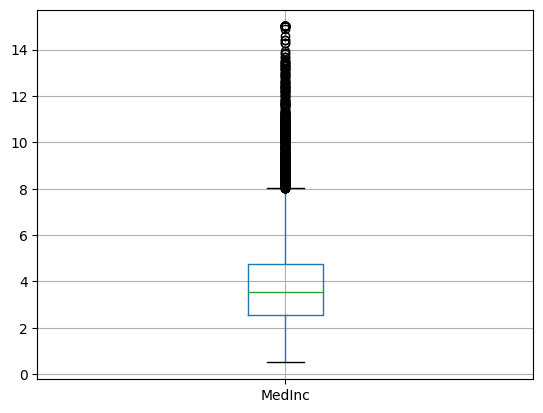

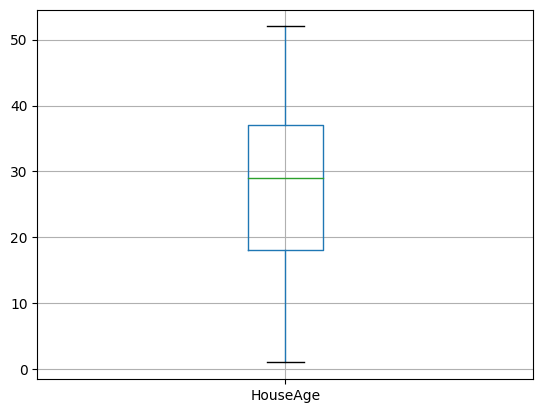

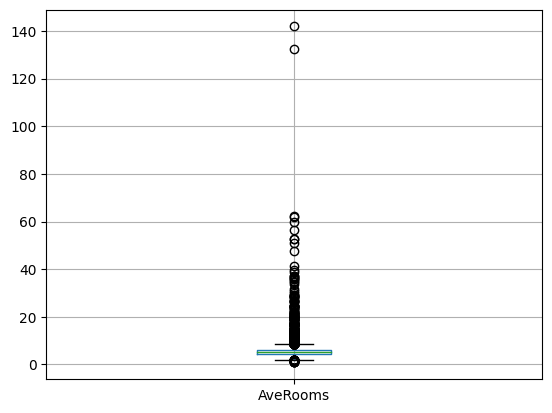

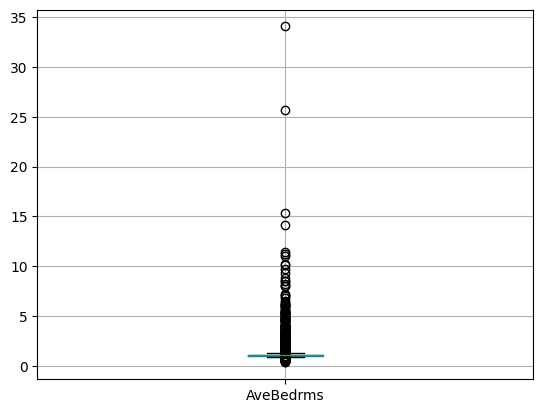

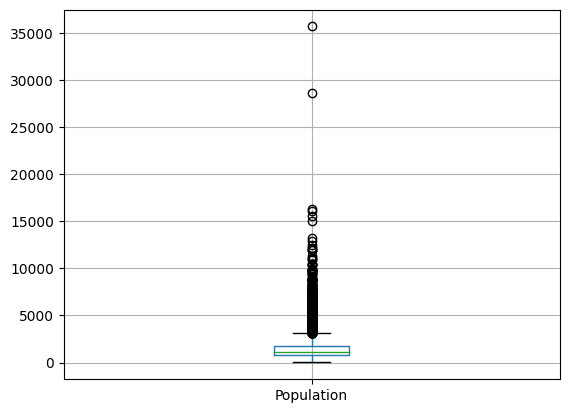

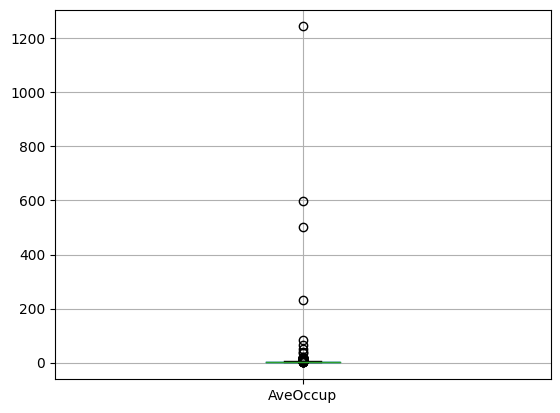

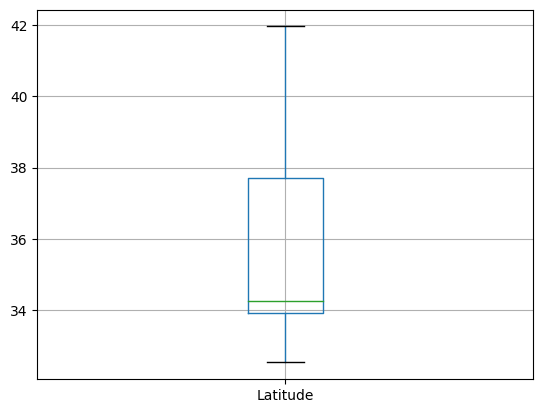

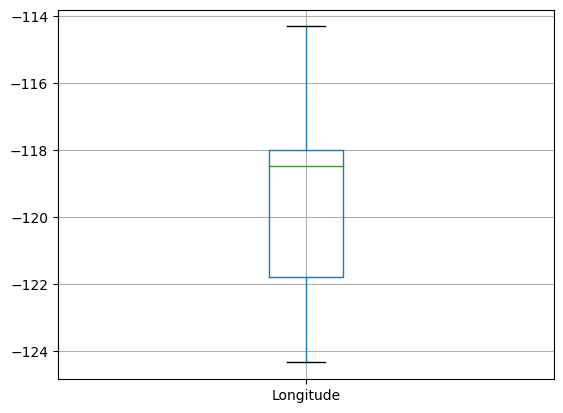

In [5]:
# Draw boxplot
for column in california_df:
    plt.figure()
    california_df.boxplot([column])

#### Drow boxplot for all columns at ones using seaborn

<Axes: >

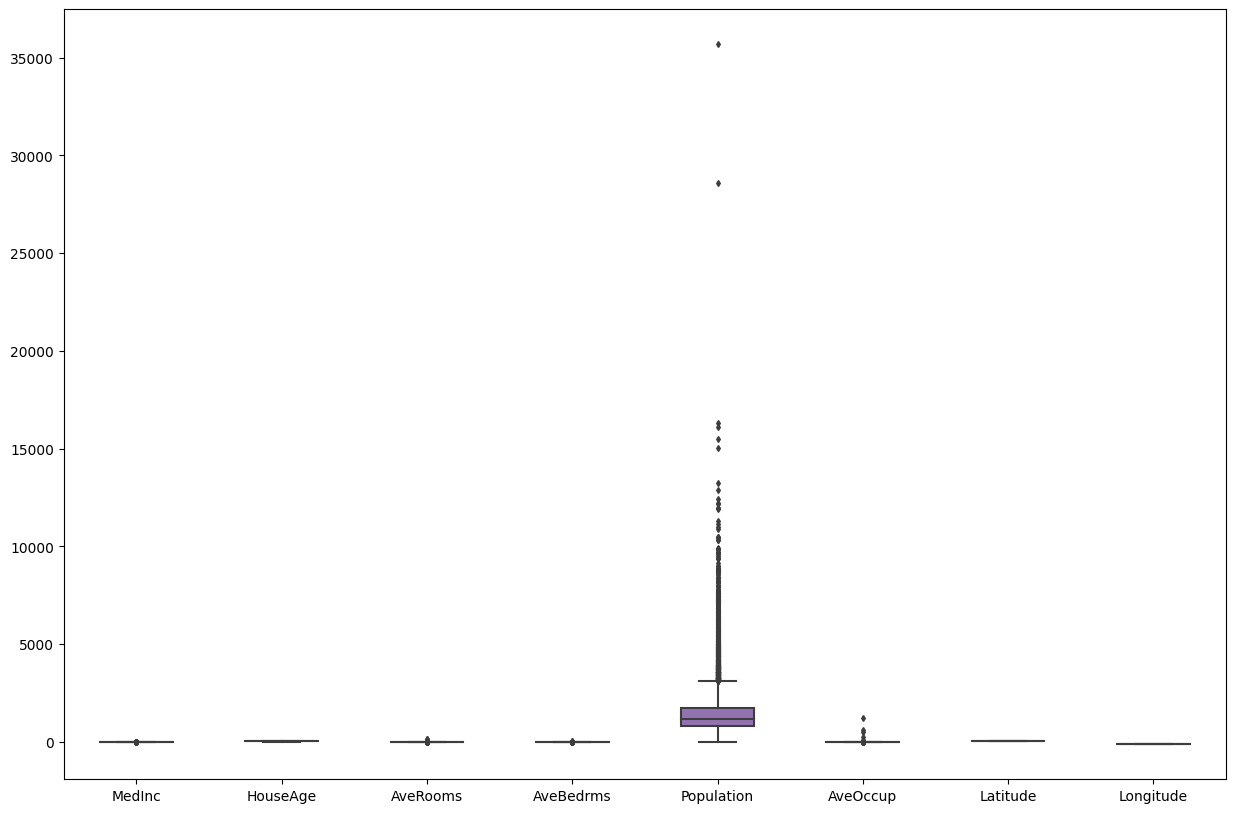

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=california_df, width= .5,ax=ax,  fliersize=3)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences: </h4>
</div>

- By observing above boxplot you can manualy detect the outlier values.
- Example : In the above boxplots crim, Zn, B features contains more outlier values comparing to others.

Let's find these points mathematically, not visually. Let's look at Interquartile Range (IQR)

### Outlier Detection using Interquartile Range (IQR)

The interquartile range (IQR) is a measure of stastical dispersion which is equal to the difference between 1st and 3rd quartile. It's basically first quartile subtracted from the third quartile.  

IQR = Q₃ − Q₁

All the values above Q3 + 1.5*IQR and the values below Q1 - 1.5*IQR are outliers

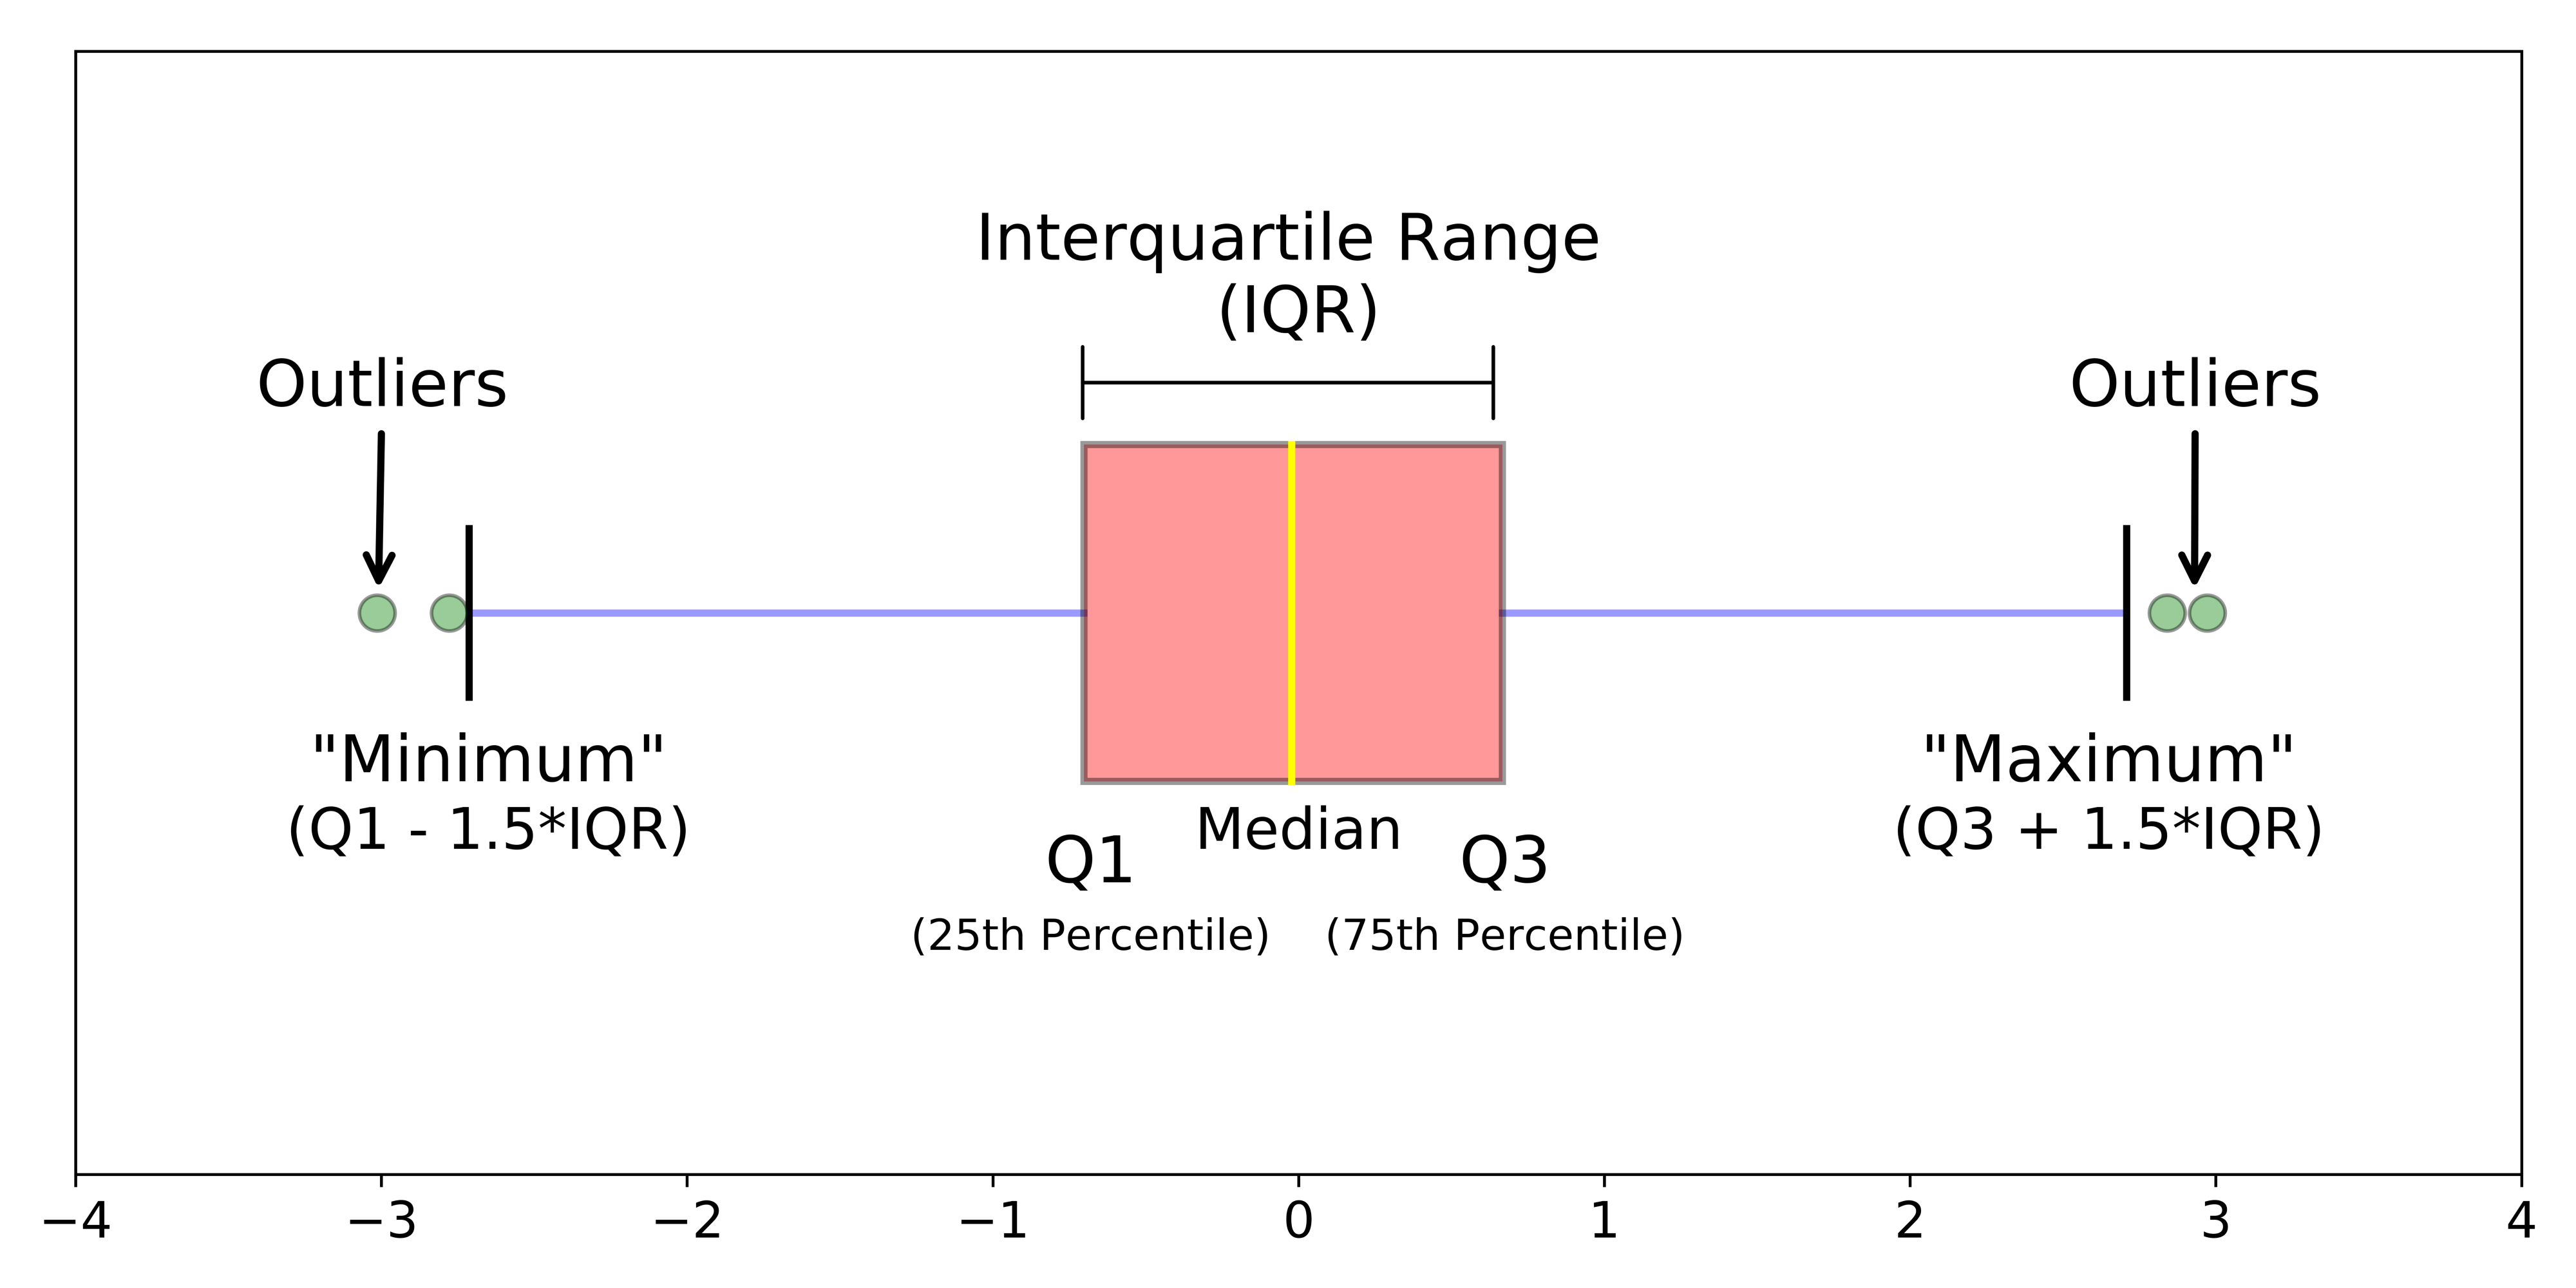

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

Let's find the outliers in the averoom feaure in california df

In [7]:
data = california_df.AveRooms
sort_data = data.sort_values()
sort_data


5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: AveRooms, Length: 20640, dtype: float64

In [8]:
#q1 = np.percentile(data, 25, interpolation = 'midpoint') 
q2 = np.percentile(data, 50, interpolation = 'midpoint') 
q3 = np.percentile(data, 75, interpolation = 'midpoint') 
q1= data.quantile(0.25)
q3=np.percentile(data,75,interpolation='midpoint')

IQR = q3 - q1 
print('Interquartile range is', IQR) 

Interquartile range is 1.6116647164839932


C:\Users\maste\AppData\Local\Temp\ipykernel_15100\2165139818.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data, 50, interpolation = 'midpoint')
C:\Users\maste\AppData\Local\Temp\ipykernel_15100\2165139818.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(data, 75, interpolation = 'midpoint')
C:\Users\maste\AppData\Local\Temp\ipykernel_15100\2165139818.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

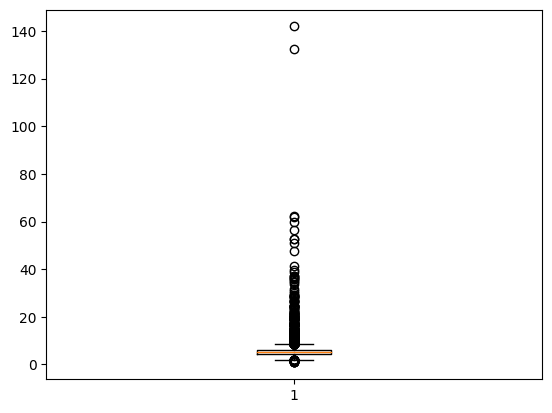

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(sort_data)
plt.show()

In [10]:
lower_limit = q1 - 1.5*(q3 - q1)
upper_limit = q3 + 1.5*(q3 - q1)
print(lower_limit)
print(upper_limit)


lower_limitoutliers = sort_data[sort_data < lower_limit]
upper_limitoutliers = sort_data[sort_data > upper_limit]


2.023219161170969
8.469878027106942


In [11]:
upper_limitoutliers

14490      8.470109
19806      8.471698
20395      8.474242
17294      8.478723
1556       8.481046
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: AveRooms, Length: 466, dtype: float64

In [12]:
lower_limitoutliers

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
9319     1.553030
4585     1.598131
4862     1.625514
2779     1.629630
4424     1.640000
4583     1.654440
4592     1.678571
4639     1.680774
4601     1.708995
73       1.714286
4556     1.748287
4597     1.750814
4584     1.768025
4588     1.784530
4636     1.806122
7313     1.819277
15660    1.824719
4582     1.868074
4281     1.875000
4612     1.885057
15654    1.902087
4263     1.911826
4586     1.926877
14332    1.968051
4609     1.972644
5326     1.972906
4671     1.985337
4663     1.986547
16534    2.000000
4638     2.005701
4864     2.008734
14325    2.015345
17164    2.018349
16186    2.018868
4553     2.020725
Name: AveRooms, dtype: float64

### Challenge

Compute the lower limit and upper limit for detecting outliers based on 1.5*IQR  in `TAX` column in `df`

```python
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston


df = load_boston()
boston_df = pd.DataFrame(df.data)
boston_df.columns = df.feature_names
```

Link: https://git.io/Jzy25

In [13]:
# Solution
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston


df = load_boston()
boston_df = pd.DataFrame(df.data)
boston_df.columns = df.feature_names
boston_df.head()
boston_df

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
data = boston_df.TAX 
sort_data = np.sort(data) 
sort_data

array([187., 188., 188., 188., 188., 188., 188., 188., 193., 193., 193.,
       193., 193., 193., 193., 193., 198., 216., 216., 216., 216., 216.,
       222., 222., 222., 222., 222., 222., 222., 223., 223., 223., 223.,
       223., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
       226., 233., 233., 233., 233., 233., 233., 233., 233., 233., 241.,
       242., 242., 243., 243., 243., 243., 244., 245., 245., 245., 247.,
       247., 247., 247., 252., 252., 254., 254., 254., 254., 254., 255.,
       256., 264., 264., 264., 264., 264., 264., 264., 264., 264., 264.,
       264., 264., 265., 265., 270., 270., 270., 270., 270., 270., 270.,
       273., 273., 273., 273., 273., 276., 276., 276., 276., 276., 276.,
       276., 276., 276., 277., 277., 277., 277., 277., 277., 277., 277.,
       277., 277., 277., 279., 279., 279., 279., 280., 281., 281., 281.,
       281., 284., 284., 284., 284., 284., 284., 284., 285., 287., 287.,
       287., 287., 287., 287., 287., 287., 289., 28

In [15]:
q1 = np.percentile(data, 25, interpolation = 'midpoint') 
q2 = np.percentile(data, 50, interpolation = 'midpoint') 
q3 = np.percentile(data, 75, interpolation = 'midpoint') 



IQR = q3 - q1 
print('Interquartile range is', IQR) 

Interquartile range is 387.0


C:\Users\maste\AppData\Local\Temp\ipykernel_15100\3592794575.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data, 25, interpolation = 'midpoint')
C:\Users\maste\AppData\Local\Temp\ipykernel_15100\3592794575.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data, 50, interpolation = 'midpoint')
C:\Users\maste\AppData\Local\Temp\ipykernel_15100\3592794575.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [16]:
lower_limit = q1 - 1.5*(q3 - q1)
upper_limit = q3 + 1.5*(q3 - q1)
print(lower_limit, upper_limit)

-301.5 1246.5


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Outlier Detection using Z score</h2>
</div>

Z score is one of the most important concepts in statistics. It is also called standard score. This score helps to understand how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x -mean) / std. deviation

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

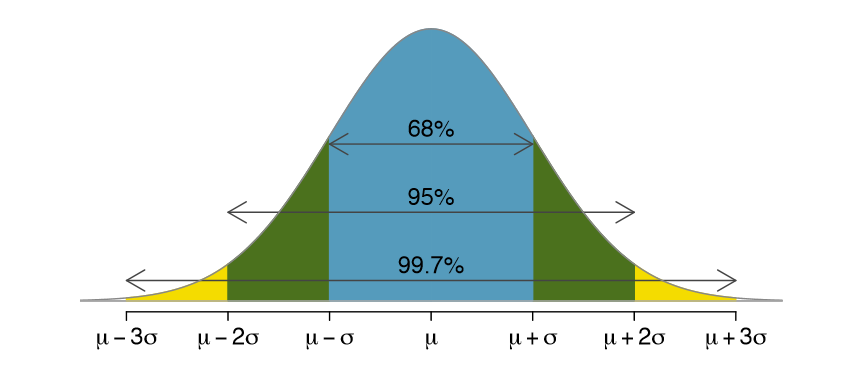

source: [pinterest graphic](https://www.pinterest.com/pin/716213146972151204/)

A normal distribution is shown below and it is estimated that
- 68% of the data points lie between +/- 1 standard deviation.
- 95% of the data points lie between +/- 2 standard deviation
- 99.7% of the data points lie between +/- 3 standard deviation


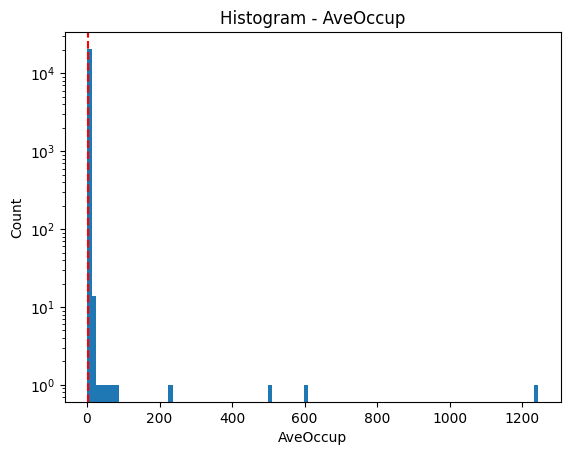

3.0706551594363742


In [17]:

n,bins, patches= plt.hist(california_df.AveOccup , bins=100, rwidth=10,log=True)
plt.axvline(np.mean(california_df.AveOccup),ls='--', c='r', label="Mean")

plt.xlabel('AveOccup')
plt.ylabel('Count')
plt.title('Histogram - AveOccup')
plt.show()
print(np.mean(california_df.AveOccup))

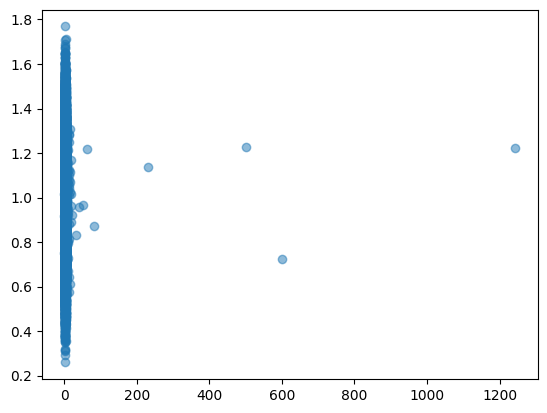

In [18]:
plt.scatter(california_df.AveOccup,np.random.normal(1,.2, size=california_df.shape[0]),alpha=0.5)

In [19]:
california_df['zscore_AveOccup'] = (california_df['AveOccup']  - california_df['AveOccup'].mean() ) / california_df['AveOccup'].std()
california_df.head(50)
#zscore_AveOccup=california_df['AveOccup'].transform(lambda x: (x-x.mean())/x.std())
#plt.boxplot(zscore_AveOccup)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,zscore_AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,-0.049595
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,-0.092510
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,-0.025842
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,-0.050328
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,-0.085614
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,-0.089616
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,-0.090723
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,-0.123473
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,-0.100497
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,-0.086499


In [20]:
# Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away
oulier_inex=california_df[(california_df['zscore_AveOccup']>3)|(california_df['zscore_AveOccup']<-3)].index.tolist()


In [21]:
california_df_removedOutlier= california_df.drop(oulier_inex, axis=0)
california_df_removedOutlier

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,zscore_AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,-0.049595
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,-0.092510
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,-0.025842
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,-0.050328
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,-0.085614
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,-0.049109
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.005021
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,-0.071733
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,-0.091223


{'whiskers': [<matplotlib.lines.Line2D at 0x1b74cadb990>,
 'caps': [<matplotlib.lines.Line2D at 0x1b74cad81d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b74cb24090>],
 'medians': [<matplotlib.lines.Line2D at 0x1b74cad9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b74cadbd10>],
 'means': []}

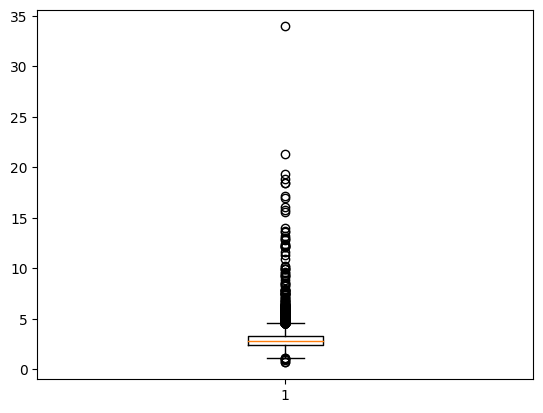

In [22]:
plt.boxplot(california_df_removedOutlier.AveOccup)

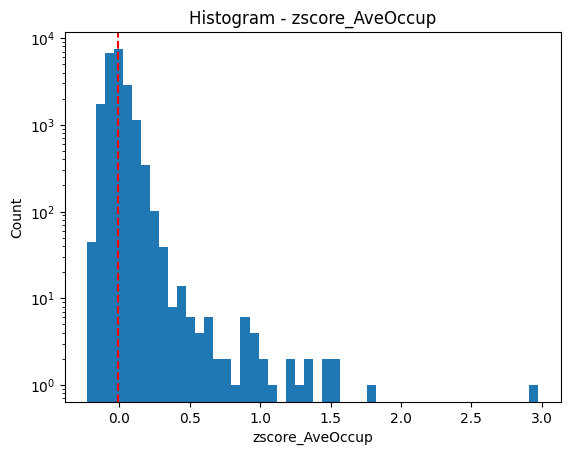

20632


In [23]:
n,bins, patches= plt.hist(california_df_removedOutlier.zscore_AveOccup , bins=50, rwidth=10,log=True)
plt.axvline(np.mean(california_df_removedOutlier.zscore_AveOccup),ls='--', c='r', label="Mean")

plt.xlabel('zscore_AveOccup')
plt.ylabel('Count')
plt.title('Histogram - zscore_AveOccup')
plt.show()
print(california_df_removedOutlier.shape[0])

In [24]:
california_df.shape

(20640, 9)

In [25]:
california_df_removedOutlier.shape

(20632, 9)

In [26]:

outlierList=california_df[(california_df['zscore_AveOccup']>3)|(california_df['zscore_AveOccup']<-3)].index.tolist()
california_df.loc[outlierList,["AveOccup","zscore_AveOccup"]]

,AveOccup,zscore_AveOccup
3364,599.714286,57.446638
8874,41.214286,3.672583
9172,83.171429,7.712343
12104,63.750000,5.842389
13034,230.172414,21.866038
16420,51.400000,4.653294
16669,502.461538,48.082852
19006,1243.333333,119.416210


In [27]:
#capping the outliers
lower_cap_percentile= np.percentile(california_df['AveOccup'],10)
upper_cap_percentile=np.percentile(california_df['AveOccup'],90)
print('lower 10 percentile',lower_cap_percentile)
print('upper 90 percentile', upper_cap_percentile)

lower 10 percentile 2.0756301514280238
upper 90 percentile 3.8852727133445693


In [28]:
new_col= np.where(california_df['AveOccup']>upper_cap_percentile,upper_cap_percentile,california_df['AveOccup'])
new_col[outlierList]

array([3.88527271, 3.88527271, 3.88527271, 3.88527271, 3.88527271,
       3.88527271, 3.88527271, 3.88527271])

### Challenge

Compute the Z score for `B` column in `df`. Find the number of outliers (with z > |3| as cutoff).

```python
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston


df = load_boston()
challenge_df = pd.DataFrame(df.data)
challenge_df.columns = df.feature_names
```

Code Link: https://git.io/JaUCl

In [29]:
# Solution
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston


df = load_boston()
challenge_df = pd.DataFrame(df.data)
challenge_df.columns = df.feature_names
challenge_df.head()
challenge_df

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
data = challenge_df.B 
data

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

In [31]:
zscore_B = (data  - data.mean() ) / data.std()
zscore_B

0      0.440616
1      0.440616
2      0.396035
3      0.415751
4      0.440616
         ...   
501    0.386834
502    0.440616
503    0.440616
504    0.402826
505    0.440616
Name: B, Length: 506, dtype: float64

In [32]:
len(zscore_B[(zscore_B<-3) | (zscore_B>3)])

25

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. What are different ways to treat outliers?</h2>
</div>

It is not always a requirement to 'treat' outliers. If you feel that the outliers are valid datapoints and you want the ML algorithm to model and predict them, then no need to 'treat' outliers. However, if you feel you don't want your model to make such extreme predictions, then you should go ahead and treat them. 

There are different ways to treat the outliers in time series. Some of those are:
- Remove the outliers
- Quantile based caping the maximum and minimum values
- Treat the value as missing value and use all the imputation values


### Remove the outliers
In the previous section, you have computed the z score. All you have to do is remove the points which has z score more than 3 or less than -3. Or have the points which have z score less than 3 and more than -3.

In [33]:
new_df = boston_df[(boston_df.zscore_LSTAT > -3) | (boston_df.zscore_LSTAT < 3)]
new_df.head()

AttributeError: 'DataFrame' object has no attribute 'zscore_LSTAT'

### Quantile based capping
Cap the outliers with the quantile values, generally we go ahead with 5% and 95% quantiles (or 10% and 90% quantiles). As per the requirement you can change it as well

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
lower_cap_percentile = np.percentile(boston_df['LSTAT'], 10)
upper_cap_percentile = np.percentile(boston_df['LSTAT'], 90)

print("10 percentile :", lower_cap_percentile)
print("90 percentile :", upper_cap_percentile)

Let's print the original values from index 370 to 380 which has 2 outliers at 373 and 374. Later we will print it post outlier treatment

In [ ]:
# original values
boston_df['LSTAT'][370:380]

In [ ]:
# Outlier capping
new_col = np.where(boston_df['LSTAT'] > upper_cap_percentile, upper_cap_percentile, boston_df['LSTAT'])
new_col[370:380]

As you can see the outlier values 34.77 and 37.97 have been capped with 23.035

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Multivariate Outlier Detection</h2>
</div>

Multivariate outlier is the combination of unusual values in two or more variables in the dataset. Or in words I should say the complete row is an outlier rather than just 1 value in a variable.  

There are various ways to detect such outliers:
- Mahalanobis Distance
- Cook's Distance

## Outlier detection using mahalanobis distance

Mahalanobis distance is an effective multivariate distance metric that measures the distance between a point (vector) and a distribution. It is effectively a multivariate equivalent of the Euclidean distance.

It if very effective on multivariate data because it uses a covariance matrix of variables to find the distance between data points and the center. This means that MD detects outliers based on the distribution pattern of data points, unlike the Euclidean distance.

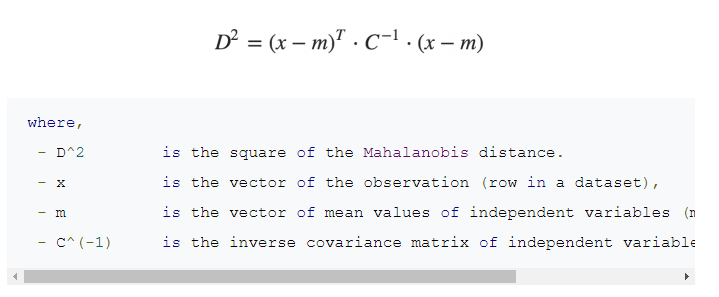

Source: machinelearningplus.com

In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize
from scipy.stats import norm
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4]]

fig,ax= plt.subplots(figsize=(10,5))
sns.boxplot(df,ax=ax)

df.shape

In [ ]:
plt.hist(df.depth,bins=50,density=True, alpha=0.6, color='b')
mu, std = norm.fit(df.depth) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)

In [ ]:

plt.hist(df.depth,bins=50,density=True, alpha=0.6, color='b')


In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth']].head(25000)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth']])
df_x


In [ ]:
# Mahalanobis distance profile
df_x['mahala'].plot();

__Extreme Obs__

In [ ]:
# Outliers
df_x[df_x['mahala'] > 25]


__View the outliers__

In [ ]:
# view the outliers
ax1 = df_x.plot.scatter('carat', 'depth', title="Carat vs Depth");
df_x[df_x['mahala'] > 25].plot.scatter('carat', 'depth', title="Carat vs Depth", color='red', ax=ax1);

## Outlier Detection using Cook's Distance

Cook’s distance is a measure computed with respect to a given regression model and therefore is impacted only by the X variables included in the model. But, what does cook’s distance mean? It computes the influence exerted by each data point (row) on the predicted outcome.

The cook’s distance for each observation i measures the change in Ŷ  (fitted Y) for all observations with and without the presence of observation i, so we know how much the observation i impacted the fitted values. Mathematically, cook’s distance Di for observation i is computed as:

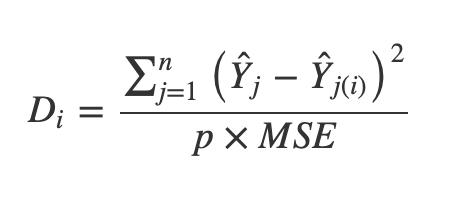

where,

- Ŷ j is the value of jth fitted response when all the observations are included.
- Ŷ j(i) is the value of jth fitted response, where the fit does not include observation i.
- MSE is the mean squared error.
- p is the number of coefficients in the regression model.

####  Step 1: Prepare Data

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Automobile_data.csv") #reading the csv data
df

In [ ]:
df = df.loc[:, ['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(drop = True, inplace = True)
df.head()

In [ ]:
fig,ax= plt.subplots(figsize=(12,7))
sns.boxplot(data=df,ax=ax,width=.2)

#### Step 2 : Train linear regression model

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['price']

#define explanatory variable
x = df[['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]


In [ ]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit() 


#### Step 3 : Calculate Cook's distance

In [ ]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()


In [ ]:
#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)


#### Step 4: Visualize the cook's distance and find influencial points

The rows which have cook's distance greater than 4x of mean cook's distance are known as influencial points 

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
mean_cooks = np.mean(cooks[0])
mean_cooks

In [ ]:
mean_cooks_list = [4*mean_cooks for i in df.index]

mean_cooks_list

In [ ]:
for i in df.index:
    print(i)

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
# Influencial points
influencial_points = df.index[cooks[0] > 4*mean_cooks]
influencial_points

In [ ]:
df.iloc[influencial_points, :]

### Challenge

Find the number of multivariate outliers in life expectancy `df` using cook's distance. Use all the numerical columns and drop all the rows with missing values

```python
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/Life Expectancy Data.csv')

```

Code Link: https://git.io/Jz76J

In [ ]:
df=pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Life Expectancy Data.csv')
df.columns=df.columns.str.replace(" ","")
df.dropna(inplace=True)
numerics=['int16','int64','int32','float16','float32','float64']
df=df.select_dtypes(include=numerics)
df

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Lifeexpectancy'],bins=50, width=2,density=0.6,color='skyblue')
mu, std= norm.fit(df['Lifeexpectancy'])
xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 200)
p=norm.pdf(x,mu,std)
plt.plot(x, p, 'k', linewidth=2)


In [ ]:
for sol in df.columns:
    df.boxplot([sol])
    plt.figure()

In [ ]:
fix,ax=plt.subplots(figsize=(40,40))
sns.boxplot(df,ax=ax,width= .5,  fliersize=2)

In [ ]:
import statsmodels.api as sm
x=df.drop(columns='Lifeexpectancy')
y=df.Lifeexpectancy
x=sm.add_constant(x)

model=sm.OLS(y.astype(float),x.astype(float)).fit()
model

In [ ]:
influence= model.get_influence()

In [ ]:
cooking_dis=influence.cooks_distance
cooking_dis

In [ ]:
mean_cooks = np.mean(cooking_dis[0])
mean_cooks


fourtimes_mean=[4*mean_cooks for i in df.index]
fourtimes_mean

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
plt.scatter(df.index,cooking_dis[0])
plt.plot(df.index,fourtimes_mean,color='red')
#plt.plot(df.index,cooking_dis[0])
plt.xlabel("row number")
plt.ylabel("cook distance")

In [ ]:
# Solution
import pandas as pd
import numpy as np


df = pd.read_csv('Datasets/Life Expectancy Data.csv')
df.head()

In [ ]:
df = df.loc[:, ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
df = df.dropna()
df.reset_index(drop = True, inplace = True)
df.head()

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['Life expectancy ']

#define explanatory variable
x = df[['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [ ]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit() 

In [ ]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

In [ ]:
#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

In [ ]:
mean_cooks = np.mean(cooks[0])
mean_cooks

In [ ]:
mean_cooks_list = [4*mean_cooks for i in df.index]
# mean_cooks_list

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
# Influencial points
influencial_points = df.index[cooks[0] > 4*mean_cooks]
len(influencial_points)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Local Outlier factor</h2>
</div>

The Local Outlier Factor (LOF) algorithm is an unsupervised outlier detection method which works on the principle of nearest neighhbors and computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. -- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

Each datapoint is assigned a score representing the likelyhood of the point being and outlier based on the size of it's local neighborhood. 

In [ ]:
# Solution
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Life Expectancy Data.csv')
df.head()

In [ ]:
df = df.loc[:, ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
df = df.dropna()
df.reset_index(drop = True, inplace = True)
df.head()

In [ ]:
# define explanatory variable
x = df[['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# train the IsolationForest algo on data
model = LocalOutlierFactor()
yhat = model.fit_predict(x)

In [ ]:
# select all rows that are not outliers
outliers = yhat == -1

# select all rows that are not outliers
mask = yhat != -1

In [ ]:
# Outliers
x.iloc[outliers, :]

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Isolation Forest</h2>
</div>

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies. --- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

It returns the anomaly score of each sample using the IsolationForest algorithm

__Link to Original Paper:__ https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Automobile_data.csv") #reading the csv data
df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(drop = True, inplace = True)
df.head()

In [ ]:
num_cols = ["symboling", "wheel-base", "engine-size", "bore", 
            "stroke", "compression-ratio", "horsepower", "peak-rpm", 
            "city-mpg", "highway-mpg"]
df_new=df.loc[:,num_cols]
df_new=df_new.astype('float64')
df_new.info()

In [ ]:
for col in df_new:
    print(col)    
    plt.figure()
    df_new.boxplot([col])

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(df[num_cols],width=.7)
plt.xlabel("feature list")

In [ ]:
from sklearn.ensemble import IsolationForest

# train the IsolationForest algo on data
model = IsolationForest(n_estimators=1000, contamination=0.05)
yhat = model.fit_predict(df[num_cols])

In [ ]:

yhat.nonzero()

In [ ]:
# select all rows that are not outliers
outliers = yhat == -1

# select all rows that are not outliers
mask = yhat != -1
yhat[mask]

In [ ]:
# Outliers
df.iloc[outliers,:].in

In [ ]:
# Isolation Scores (Anomaly scores) - Opposite of what is defined in the paper.
model.score_samples(df[num_cols])

In [ ]:
# round it
model.score_samples(df[num_cols]).round()